In [1]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
array = np.array([
              [1,2,0],
             [5,8,1],
             [1.5,6.8,0],
             [8,0,1],
             [1,0.6,0],
             [9,11,1]])

In [8]:

data = pd.DataFrame(data=array,
                  columns=['x1', 'x2','y'])

data.head()

,x1,x2,y
0,1.0,2.0,0.0
1,5.0,8.0,1.0
2,1.5,6.8,0.0
3,8.0,0.0,1.0
4,1.0,0.6,0.0


Text(0.5,1,'Count of y')

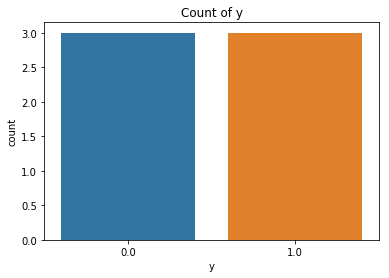

In [9]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='y', data=data)
plt.title("Count of y")

In [10]:
num=['x1','x2']
corr_df=data[num]
corr_df.head()

,x1,x2
0,1.0,2.0
1,5.0,8.0
2,1.5,6.8
3,8.0,0.0
4,1.0,0.6


In [13]:
#Let's find correlation between Numeric Variable¶
cor= corr_df.corr(method='pearson')
print(cor)

          x1        x2
x1  1.000000  0.380949
x2  0.380949  1.000000


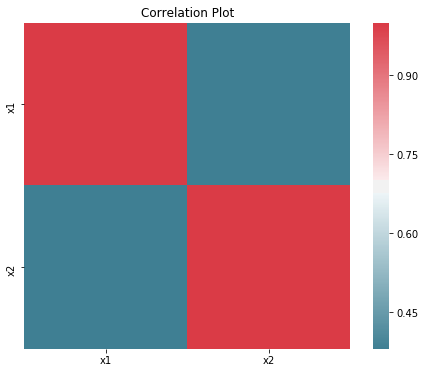

In [14]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Text(0.5,1,'Impact of x1 on y')

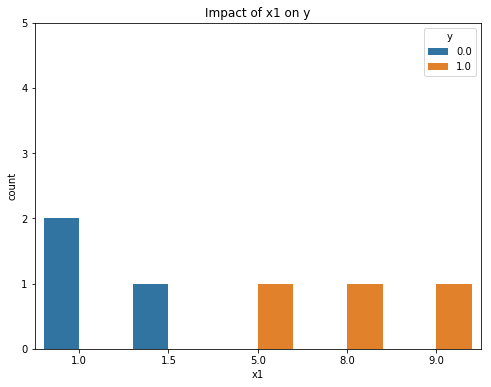

In [15]:
#First Let's check the impact of feeature x1 on y

fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='x1', data=data, hue='y')
ax.set_ylim(0,5)
plt.title("Impact of x1 on y")


Text(0.5,1,'Impact of x2 on y')

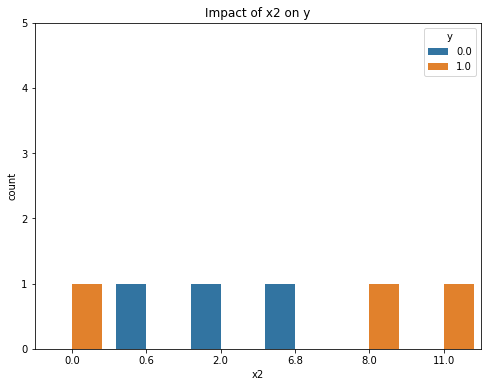

In [16]:
#First Let's check the impact of feeature x2 on y

fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='x2', data=data, hue='y')
ax.set_ylim(0,5)
plt.title("Impact of x2 on y")

Text(0.5,1,'x2 vs y')

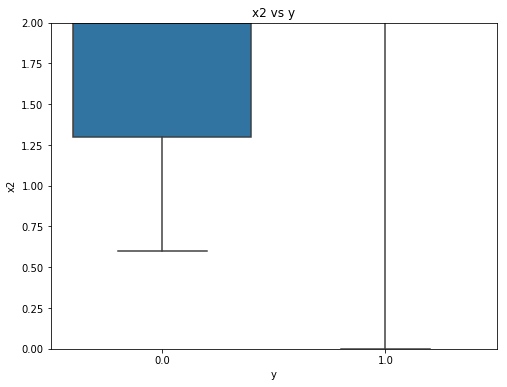

In [17]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='y',y='x2', data=data)
ax.set_ylim(0,2)
plt.title("x2 vs y")

In [18]:
#Handling Missing Values¶
print(data.isnull().sum())

x1    0
x2    0
y     0
dtype: int64


In [19]:
#Only 4 features have missing values

data['x1'].describe()

count    6.000000
mean     4.250000
std      3.629738
min      1.000000
25%      1.125000
50%      3.250000
75%      7.250000
max      9.000000
Name: x1, dtype: float64

In [20]:
data['x1'].value_counts()

1.0    2
9.0    1
8.0    1
1.5    1
5.0    1
Name: x1, dtype: int64

In [21]:
#Let's replace missing values by median of x2.

#med=np.nanmedian(data['x2'])
data['x2']=data['x2'].fillna(0)
#Handling Missing Values¶
print(data.isnull().sum())

x1    0
x2    0
y     0
dtype: int64


In [22]:
from scipy.stats import chi2_contingency
#Let's use chi-square test to understand relationship between features and target variable

csq=chi2_contingency(pd.crosstab(data['y'], data['x1']))
print("P-value: ",csq[1])

P-value:  0.1991482734714558
